# LUNG DISEASE CLASSIFICATION

### Task 1 - Exploratory Data Analysis (EDA)

#### Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data

df = pd.read_csv(r"D:/BSBI/1st SEM/AI/lung_disease_v1.csv", low_memory=False,na_values=['?'])
df.head()

patient_id  age     sex   bmi smoking_status  pack_years  pm25_exposure  \
0           1   49    Male  20.1          Never        21.0           20.8   
1           2   61  Female  28.4        Current        34.1           10.8   
2           3   70    Male  22.2        Current        15.7           12.0   
3           4   47    Male  23.1        Current        49.0           20.0   
4           5   70  Female  29.0         Former         6.0            6.0   

      occupation family_history  cough  ...  dlco_pct_pred    cxr_finding  \
0         Office            NaN      1  ...           82.1         Normal   
1         Office            NaN      0  ...           81.1         Normal   
2  Manufacturing            NaN      1  ...           85.4  Consolidation   
3  Manufacturing            NaN      0  ...           49.0         Normal   
4         Office            NaN      0  ...           81.6         Normal   

   ct_nodule_size_mm  ct_emphysema_pct  sixmwd_m  hypertension  diabetes  \
0                3.0              11.9       447             1         1   
1                5.9               2.1       394             0         0   
2                2.8               4.8       309             0         1   
3                1.8              29.4       190             0         0   
4                1.0               9.5       314             0         0   

   hospital_visits_last_year  disease_type   severity  
0                          0        Asthma   Moderate  
1                          0   Lung Cancer  Mild/None  
2                          0     Pneumonia  Mild/None  
3                          0          COPD   Moderate  
4                          0       Healthy  Mild/None  

[5 rows x 33 columns]

#### Dropping personal identifier variable from the data: patient_id

In [3]:
df = df.drop(columns=["patient_id"])

print("Shape after dropping patient_id:", df.shape)
df.head()

Shape after dropping patient_id: (12000, 32)


age     sex   bmi smoking_status  pack_years  pm25_exposure     occupation  \
0   49    Male  20.1          Never        21.0           20.8         Office   
1   61  Female  28.4        Current        34.1           10.8         Office   
2   70    Male  22.2        Current        15.7           12.0  Manufacturing   
3   47    Male  23.1        Current        49.0           20.0  Manufacturing   
4   70  Female  29.0         Former         6.0            6.0         Office   

  family_history  cough  dyspnea  ...  dlco_pct_pred    cxr_finding  \
0            NaN      1        0  ...           82.1         Normal   
1            NaN      0        1  ...           81.1         Normal   
2            NaN      1        1  ...           85.4  Consolidation   
3            NaN      0        1  ...           49.0         Normal   
4            NaN      0        0  ...           81.6         Normal   

   ct_nodule_size_mm  ct_emphysema_pct  sixmwd_m  hypertension  diabetes  \
0                3.0              11.9       447             1         1   
1                5.9               2.1       394             0         0   
2                2.8               4.8       309             0         1   
3                1.8              29.4       190             0         0   
4                1.0               9.5       314             0         0   

   hospital_visits_last_year  disease_type   severity  
0                          0        Asthma   Moderate  
1                          0   Lung Cancer  Mild/None  
2                          0     Pneumonia  Mild/None  
3                          0          COPD   Moderate  
4                          0       Healthy  Mild/None  

[5 rows x 32 columns]

#### Analyzing the data 

In [4]:
# Analyzing the shape and information of the data

print(df.shape)
df.info()

(12000, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        12000 non-null  int64  
 1   sex                        12000 non-null  object 
 2   bmi                        12000 non-null  float64
 3   smoking_status             12000 non-null  object 
 4   pack_years                 12000 non-null  float64
 5   pm25_exposure              12000 non-null  float64
 6   occupation                 12000 non-null  object 
 7   family_history             4824 non-null   object 
 8   cough                      12000 non-null  int64  
 9   dyspnea                    12000 non-null  int64  
 10  wheeze                     12000 non-null  int64  
 11  chest_pain                 12000 non-null  int64  
 12  fever                      12000 non-null  int64  
 13  hemoptysis                 12000 n

In [5]:
df.dtypes

age                            int64
sex                           object
bmi                          float64
smoking_status                object
pack_years                   float64
pm25_exposure                float64
occupation                    object
family_history                object
cough                          int64
dyspnea                        int64
wheeze                         int64
chest_pain                     int64
fever                          int64
hemoptysis                     int64
weight_loss_kg               float64
spo2                         float64
respiratory_rate             float64
crp_mg_L                     float64
wbc_10e9_L                   float64
fev1_fvc                     float64
fev1_pct_pred                float64
fvc_pct_pred                 float64
dlco_pct_pred                float64
cxr_finding                   object
ct_nodule_size_mm            float64
ct_emphysema_pct             float64
sixmwd_m                       int64
h

In [6]:
# Data description of categorical variables and binary indicators

df_cat_var = df[["sex", "smoking_status", "occupation", "family_history", "cxr_finding", "disease_type", "severity", "cough", 
                 "dyspnea", "wheeze", "chest_pain", "fever", "hemoptysis", "hypertension", "diabetes"]]

df_cat_var.astype(object).describe().T

count unique        top   freq
sex             12000      2       Male   6291
smoking_status  12000      3      Never   4988
occupation      12000      7     Office   3568
family_history   4824      3       COPD   1845
cxr_finding     12000      8     Normal   6629
disease_type    12000      5    Healthy   4243
severity        12000      3  Mild/None   7055
cough           12000      2          0   6992
dyspnea         12000      2          0   7233
wheeze          12000      2          0   9039
chest_pain      12000      2          0  10343
fever           12000      2          0   9996
hemoptysis      12000      2          0  11663
hypertension    12000      2          0   7832
diabetes        12000      2          0   9789

In [7]:
# Data description for numerical variables

df_num_var = df[["age", "bmi", "pack_years", "pm25_exposure", "weight_loss_kg", "spo2", "respiratory_rate", "crp_mg_L", "wbc_10e9_L", 
                 "fev1_fvc", "fev1_pct_pred", "fvc_pct_pred", "dlco_pct_pred", "ct_nodule_size_mm", "ct_emphysema_pct", "sixmwd_m", 
                 "hospital_visits_last_year"]]

df_num_var.describe().T

count        mean         std    min     25%  \
age                        12000.0   58.070833   14.741634  18.00   48.00   
bmi                        12000.0   27.008608    4.961936  16.00   23.50   
pack_years                 12000.0   14.767758   14.848183   0.00    2.70   
pm25_exposure              12000.0   15.114308    6.689190   3.00   10.30   
weight_loss_kg             12000.0    1.624208    2.422476  -5.00    0.00   
spo2                       12000.0   95.962800    2.376014  87.20   94.40   
respiratory_rate           12000.0   17.974033    2.993347  10.00   15.90   
crp_mg_L                   12000.0   20.793150   30.606319   0.00    1.50   
wbc_10e9_L                 12000.0    8.096900    2.606807   2.00    6.30   
fev1_fvc                   12000.0    0.740610    0.100471   0.32    0.68   
fev1_pct_pred              12000.0   83.805633   18.773718  20.00   72.20   
fvc_pct_pred               12000.0   94.915475   12.051371  49.60   86.80   
dlco_pct_pred              12000.0   81.511558   17.630906  20.00   70.80   
ct_nodule_size_mm          12000.0    4.644267    5.926454   0.00    1.00   
ct_emphysema_pct           12000.0    8.275508    8.290305   0.00    2.50   
sixmwd_m                   12000.0  403.809167  109.520138 -29.00  329.00   
hospital_visits_last_year  12000.0    0.615833    0.738892   0.00    0.00   

                              50%     75%     max  
age                         58.00   68.00   90.00  
bmi                         27.00   30.40   45.60  
pack_years                  10.30   22.80   81.80  
pm25_exposure               15.00   19.70   41.30  
weight_loss_kg               1.40    3.00   13.30  
spo2                        96.00   97.70  100.00  
respiratory_rate            18.00   20.00   28.70  
crp_mg_L                    10.30   22.90  218.60  
wbc_10e9_L                   7.80    9.50   20.70  
fev1_fvc                     0.75    0.81    0.95  
fev1_pct_pred               85.10   96.50  140.00  
fvc_pct_pred                94.90  103.10  140.00  
dlco_pct_pred               82.40   93.50  139.50  
ct_nodule_size_mm            3.00    5.40   47.80  
ct_emphysema_pct             6.30   10.90   51.60  
sixmwd_m                   405.00  478.00  816.00  
hospital_visits_last_year    0.00    1.00    5.00

#### Analyzing key categorical variables

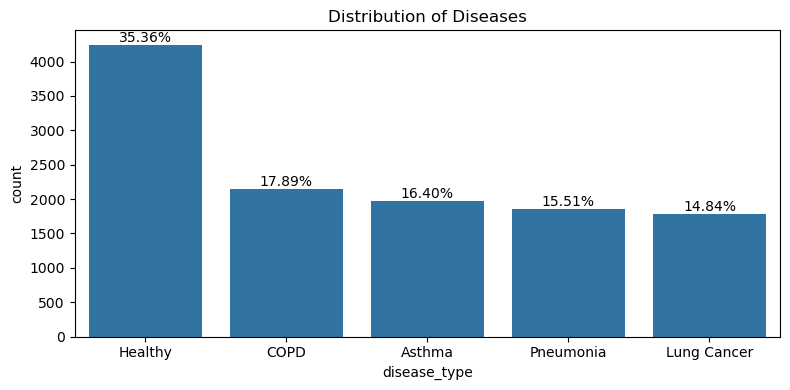

In [8]:
# Disease type

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="disease_type", order=df["disease_type"].value_counts().index)

total = len(df)
ax.bar_label(ax.containers[0], labels=[f'{100*h/total:.2f}%' for h in df["disease_type"].value_counts()])

plt.title("Distribution of Diseases")
plt.tight_layout()
plt.show()

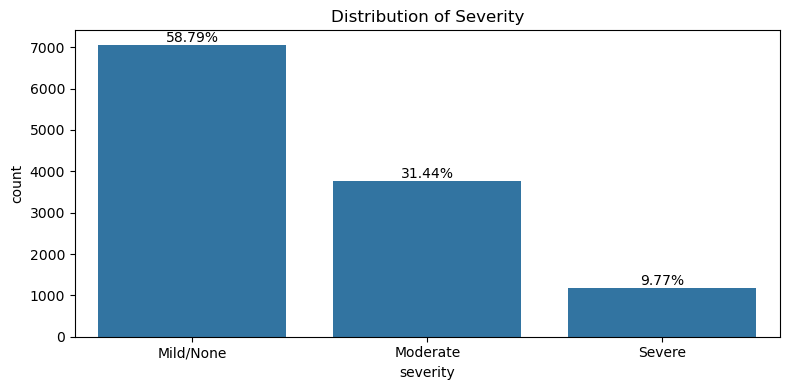

In [9]:
# Severity

plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x="severity", order=df["severity"].value_counts().index)

total = len(df)
ax.bar_label(ax.containers[0], labels=[f'{100*h/total:.2f}%' for h in df["severity"].value_counts()])

plt.title("Distribution of Severity")
plt.tight_layout()
plt.show()

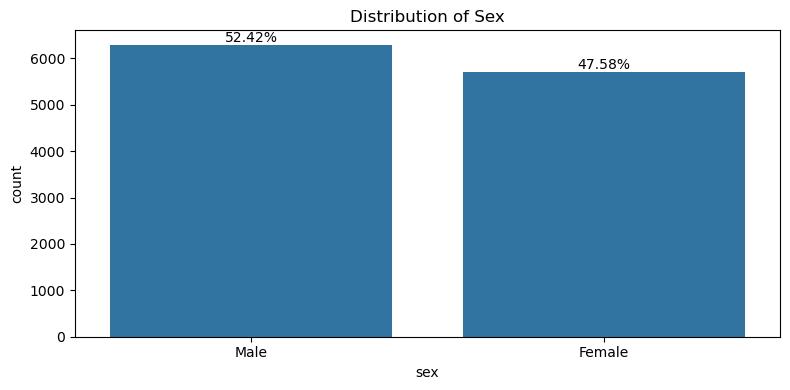

In [10]:
# Sex

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="sex", order=df["sex"].value_counts().index)

total = len(df)
ax.bar_label(ax.containers[0], labels=[f'{100*h/total:.2f}%' for h in df["sex"].value_counts()])

plt.title("Distribution of Sex")
plt.tight_layout()
plt.show()

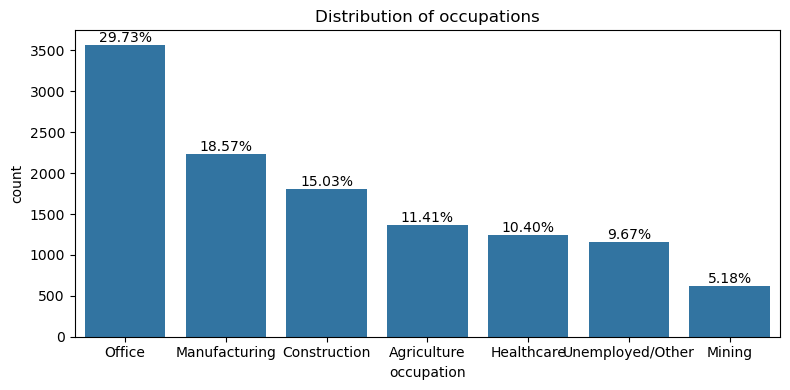

In [11]:
# Occupation

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="occupation", order=df["occupation"].value_counts().index)

total = len(df)
ax.bar_label(ax.containers[0], labels=[f'{100*h/total:.2f}%' for h in df["occupation"].value_counts()])

plt.title("Distribution of occupations")
plt.tight_layout()
plt.show()

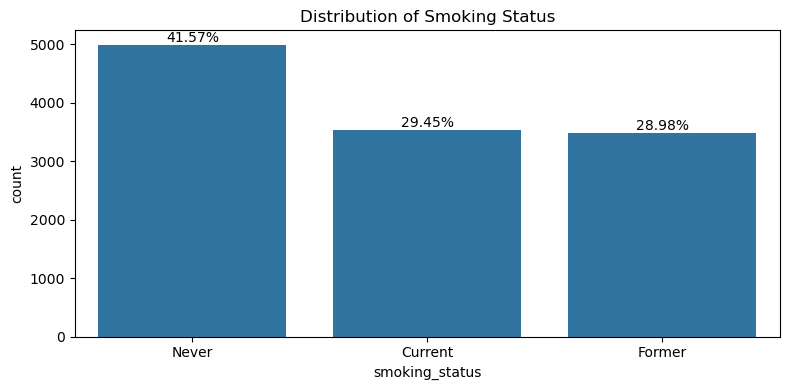

In [12]:
# Smoking status

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="smoking_status", order=df["smoking_status"].value_counts().index)

total = len(df)
ax.bar_label(ax.containers[0], labels=[f'{100*h/total:.2f}%' for h in df["smoking_status"].value_counts()])

plt.title("Distribution of Smoking Status")
plt.tight_layout()
plt.show()

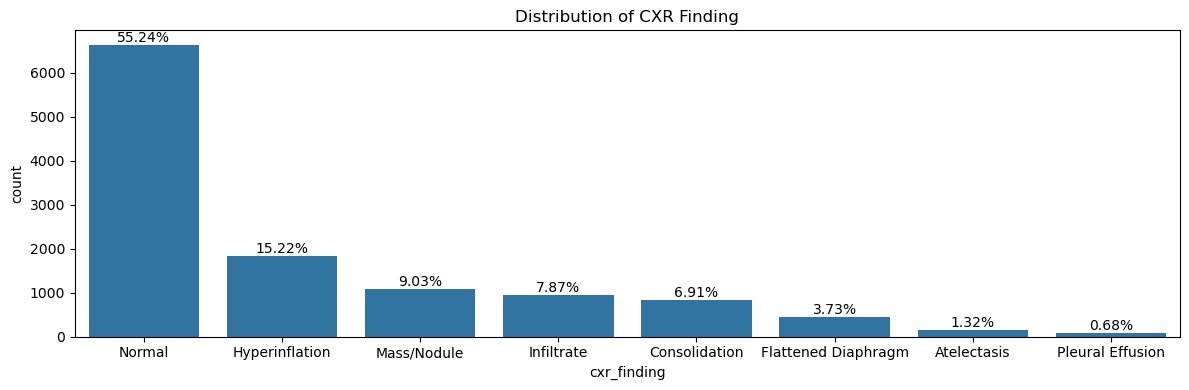

In [13]:
# CXR Finding

plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df, x="cxr_finding", order=df["cxr_finding"].value_counts().index)

total = len(df)
ax.bar_label(ax.containers[0], labels=[f'{100*h/total:.2f}%' for h in df["cxr_finding"].value_counts()])

plt.title("Distribution of CXR Finding")
plt.tight_layout()
plt.show()

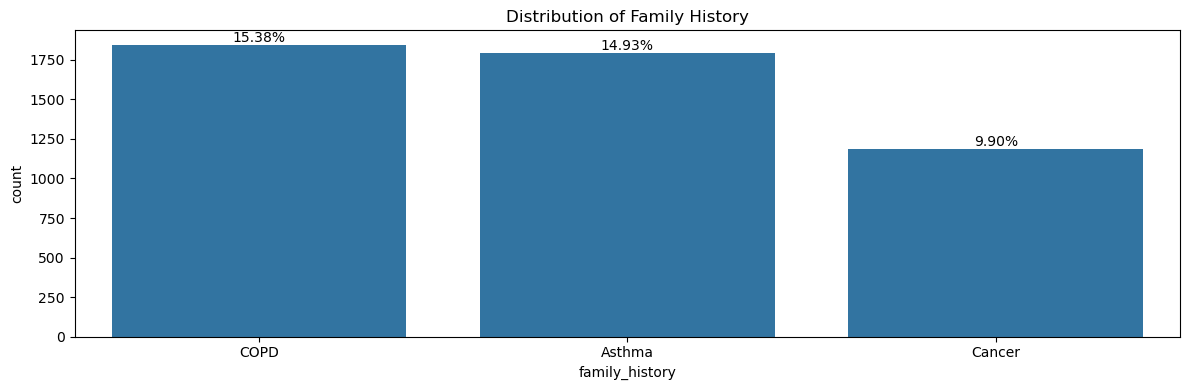

In [14]:
# Family History

plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df, x="family_history", order=df["family_history"].value_counts().index)

total = len(df)
ax.bar_label(ax.containers[0], labels=[f'{100*h/total:.2f}%' for h in df["family_history"].value_counts()])

plt.title("Distribution of Family History")
plt.tight_layout()
plt.show()

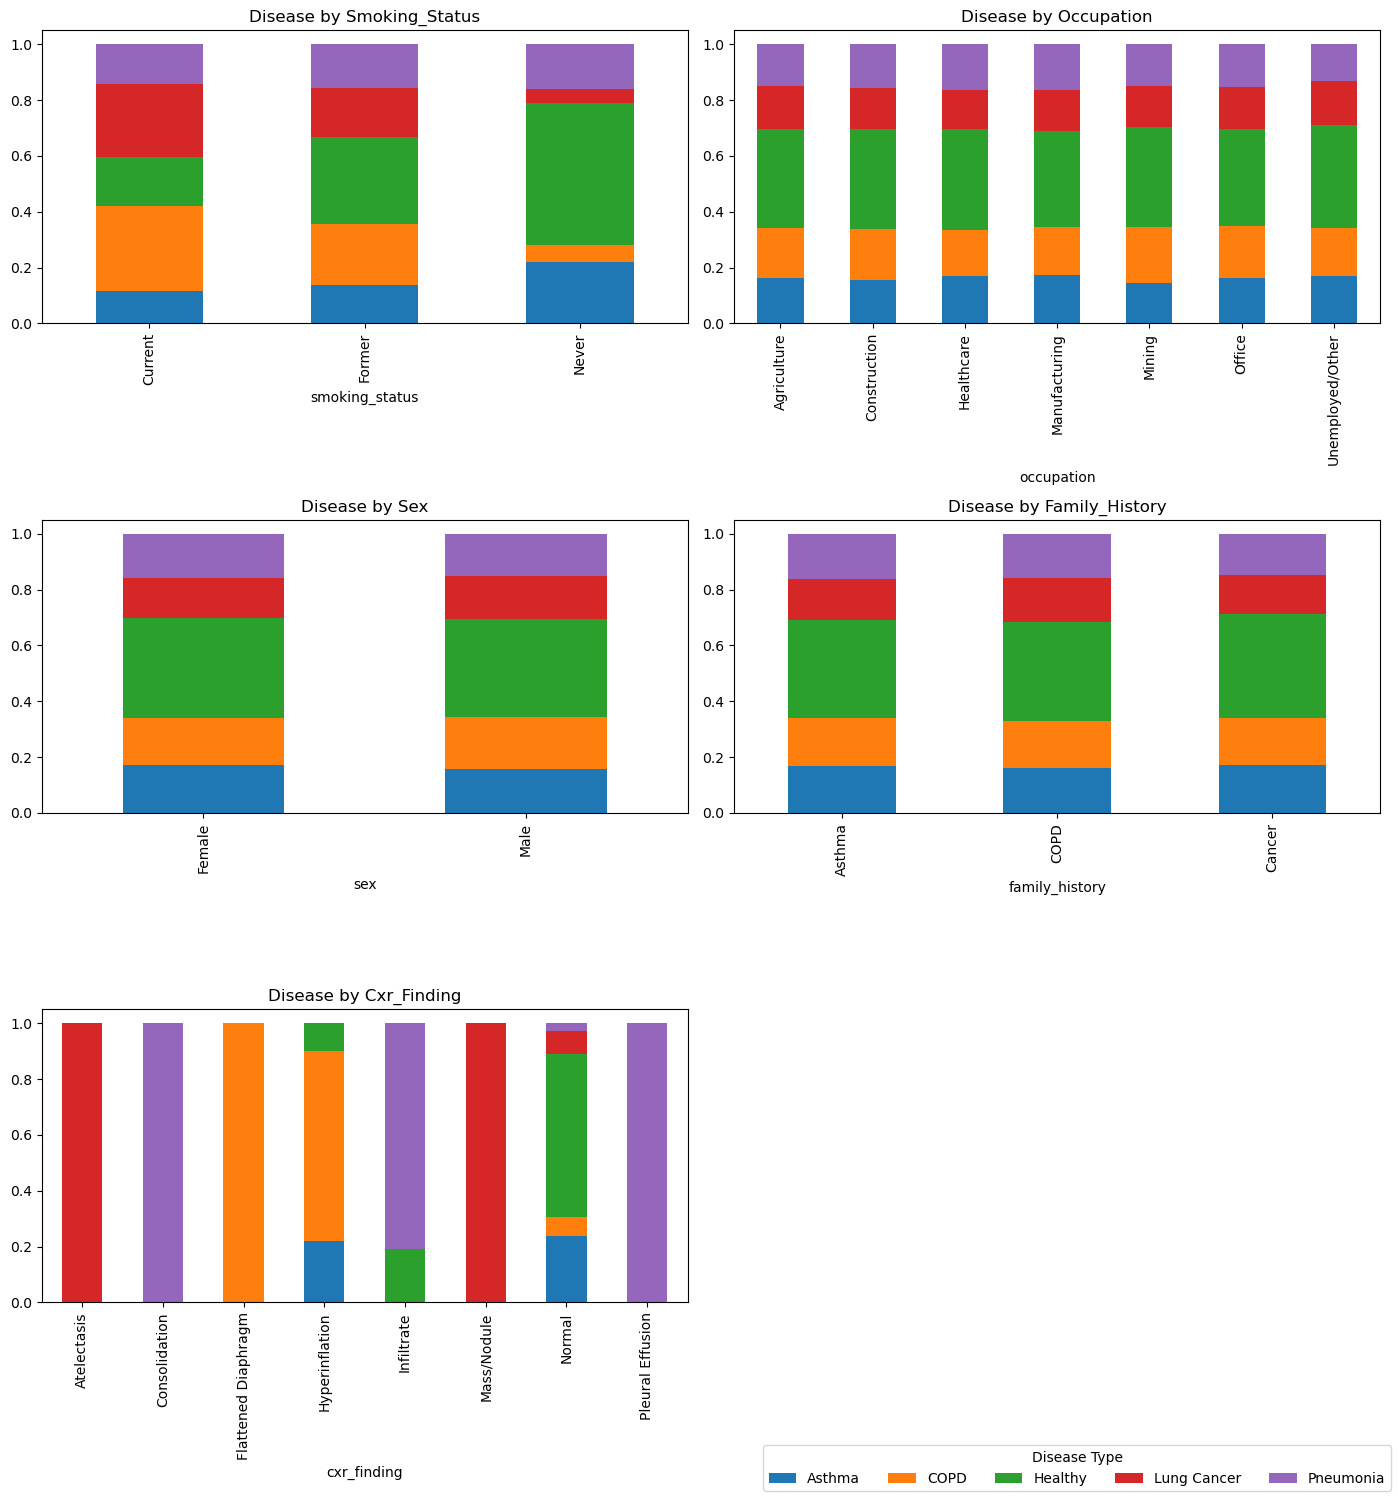

In [15]:
# Plotting categorical value association on Target Variable

cols_to_plot = ["smoking_status", "occupation", "sex", "family_history", "cxr_finding"]

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    ct = pd.crosstab(df[col], df["disease_type"], normalize="index")
    ct.plot(kind="bar", stacked=True, ax=axes[i], legend=False)
    
    axes[i].set_title(f"Disease by {col.title()}")
    axes[i].tick_params(axis="x")

fig.delaxes(axes[-1])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', ncol=5, title="Disease Type")

plt.tight_layout()
plt.show()

In [16]:
# Analyzing feature link with the target variable (disease_type)

from scipy.stats import chi2_contingency

cat_var = ["sex", "smoking_status", "occupation", "family_history", "cxr_finding", "severity", "cough", "dyspnea", "wheeze", 
                    "chest_pain", "fever", "hemoptysis", "hypertension", "diabetes"]
target = "disease_type"

chi2_results = []

for col in cat_var:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append({"Variable": col,"Chi-Square": round(chi2, 2),"P-Value": p,"Significant": "Yes" if p < 0.05 else "No"})

results_df = pd.DataFrame(chi2_results)
print(results_df)

          Variable  Chi-Square        P-Value Significant
0              sex        7.84   9.756502e-02          No
1   smoking_status     2186.39   0.000000e+00         Yes
2       occupation       18.82   7.617199e-01          No
3   family_history        4.36   8.228443e-01          No
4      cxr_finding    23366.96   0.000000e+00         Yes
5         severity     6635.32   0.000000e+00         Yes
6            cough     2726.86   0.000000e+00         Yes
7          dyspnea     2770.77   0.000000e+00         Yes
8           wheeze     2975.94   0.000000e+00         Yes
9       chest_pain      387.91   1.135951e-82         Yes
10           fever     4753.52   0.000000e+00         Yes
11      hemoptysis      531.83  8.725509e-114         Yes
12    hypertension        4.26   3.719897e-01          No
13        diabetes        0.82   9.364030e-01          No


#### Analyzing key numerical variables

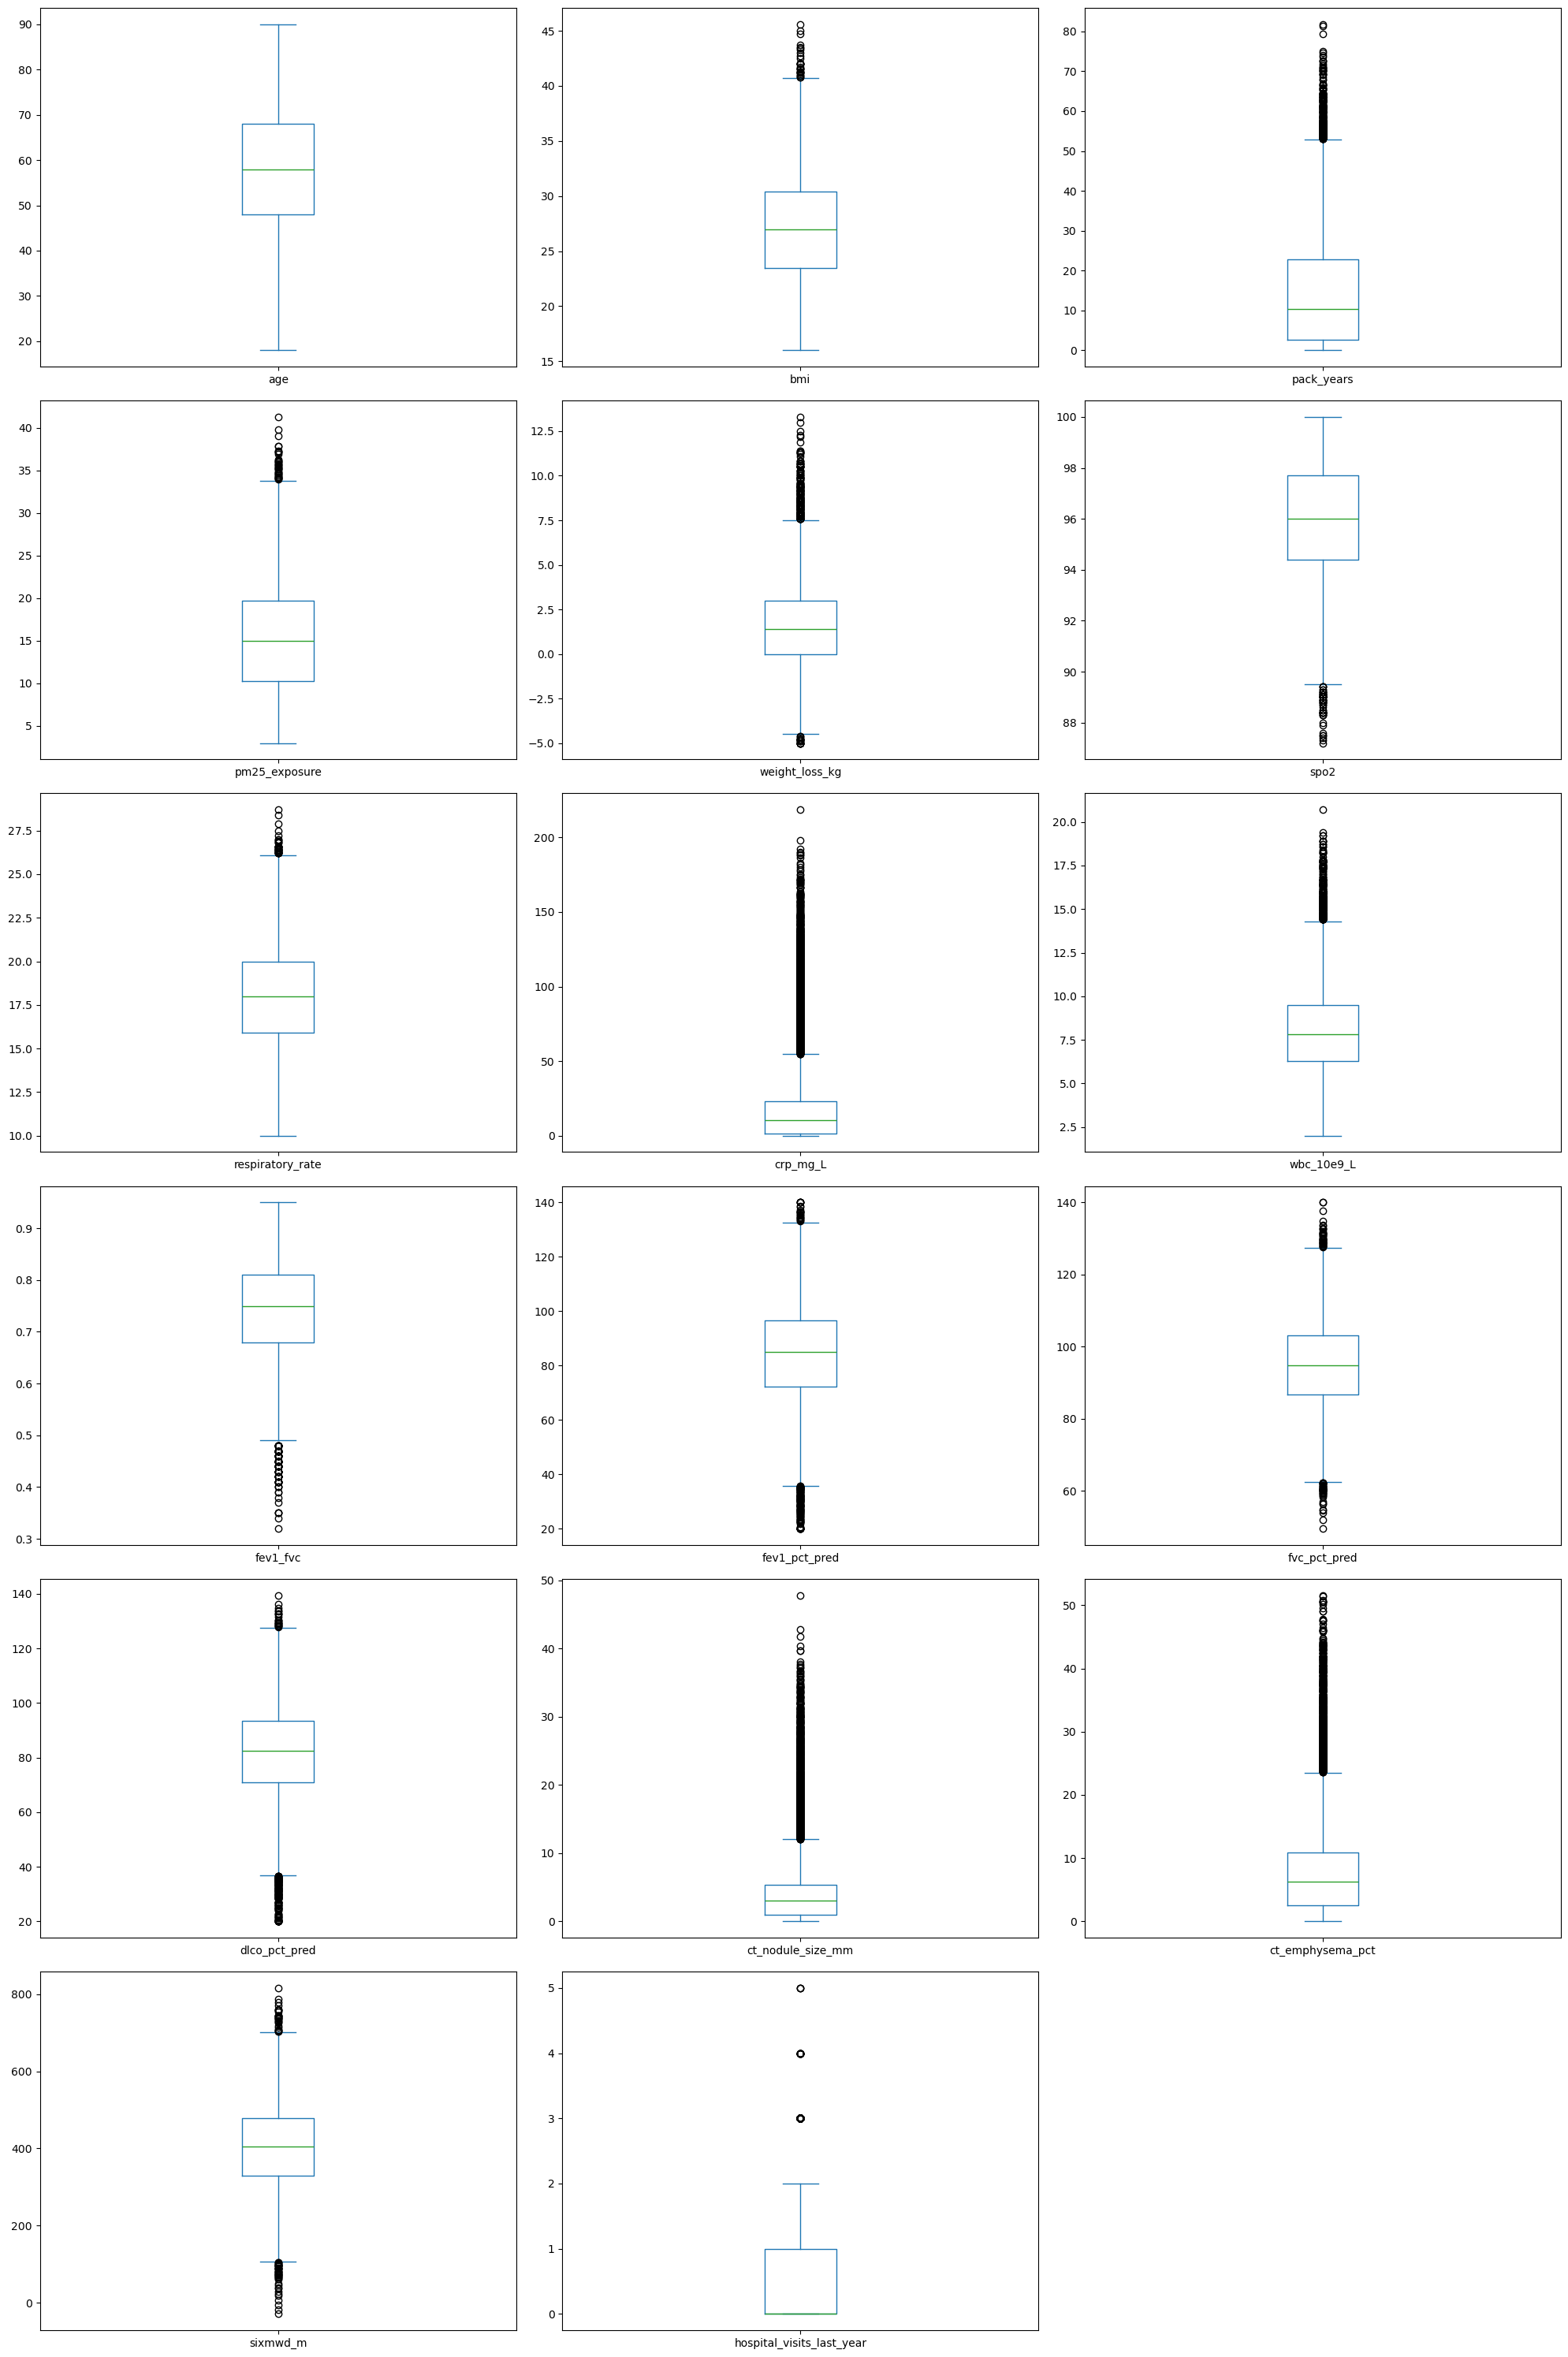

In [17]:
# Creating boxplot for numerical variables

df_num_var.plot(kind='box', subplots=True, layout=(6, 3), figsize=(20, 30), sharex=False, sharey=False)

plt.tight_layout()
plt.savefig("Boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Chencking for skewness

skewness_analysis = df_num_var.skew()

print("Skewness Analysis for Numerical Variables")
print(skewness_analysis)

Skewness Analysis for Numerical Variables
age                         -0.073984
bmi                          0.080324
pack_years                   1.159309
pm25_exposure                0.219193
weight_loss_kg               0.502260
spo2                        -0.268485
respiratory_rate            -0.001922
crp_mg_L                     2.400825
wbc_10e9_L                   0.693267
fev1_fvc                    -0.401119
fev1_pct_pred               -0.331949
fvc_pct_pred                -0.009289
dlco_pct_pred               -0.359852
ct_nodule_size_mm            2.506387
ct_emphysema_pct             1.747442
sixmwd_m                    -0.057413
hospital_visits_last_year    1.133627
dtype: float64


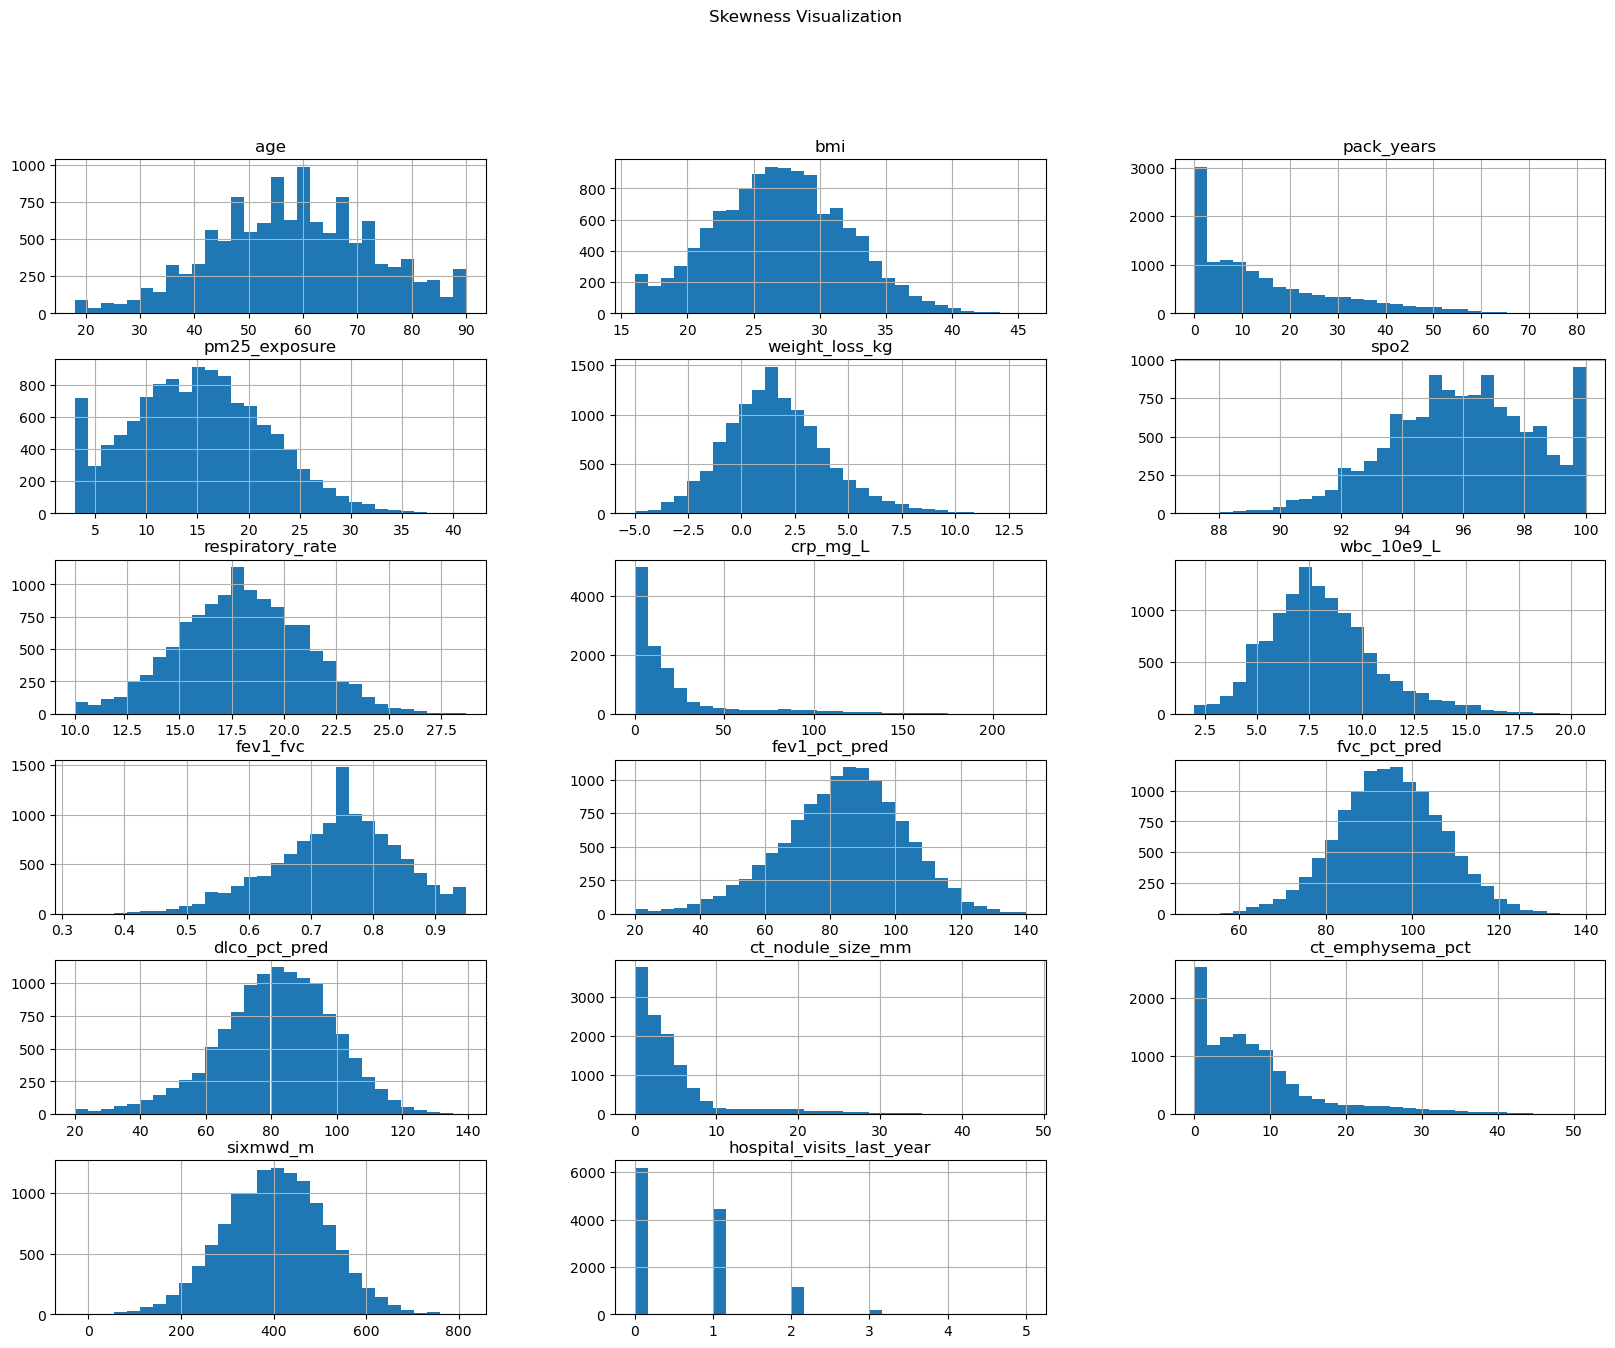

In [19]:
df_num_var.hist(bins=30, layout=(6, 3), figsize=(20, 15))

plt.suptitle("Skewness Visualization")
plt.show()

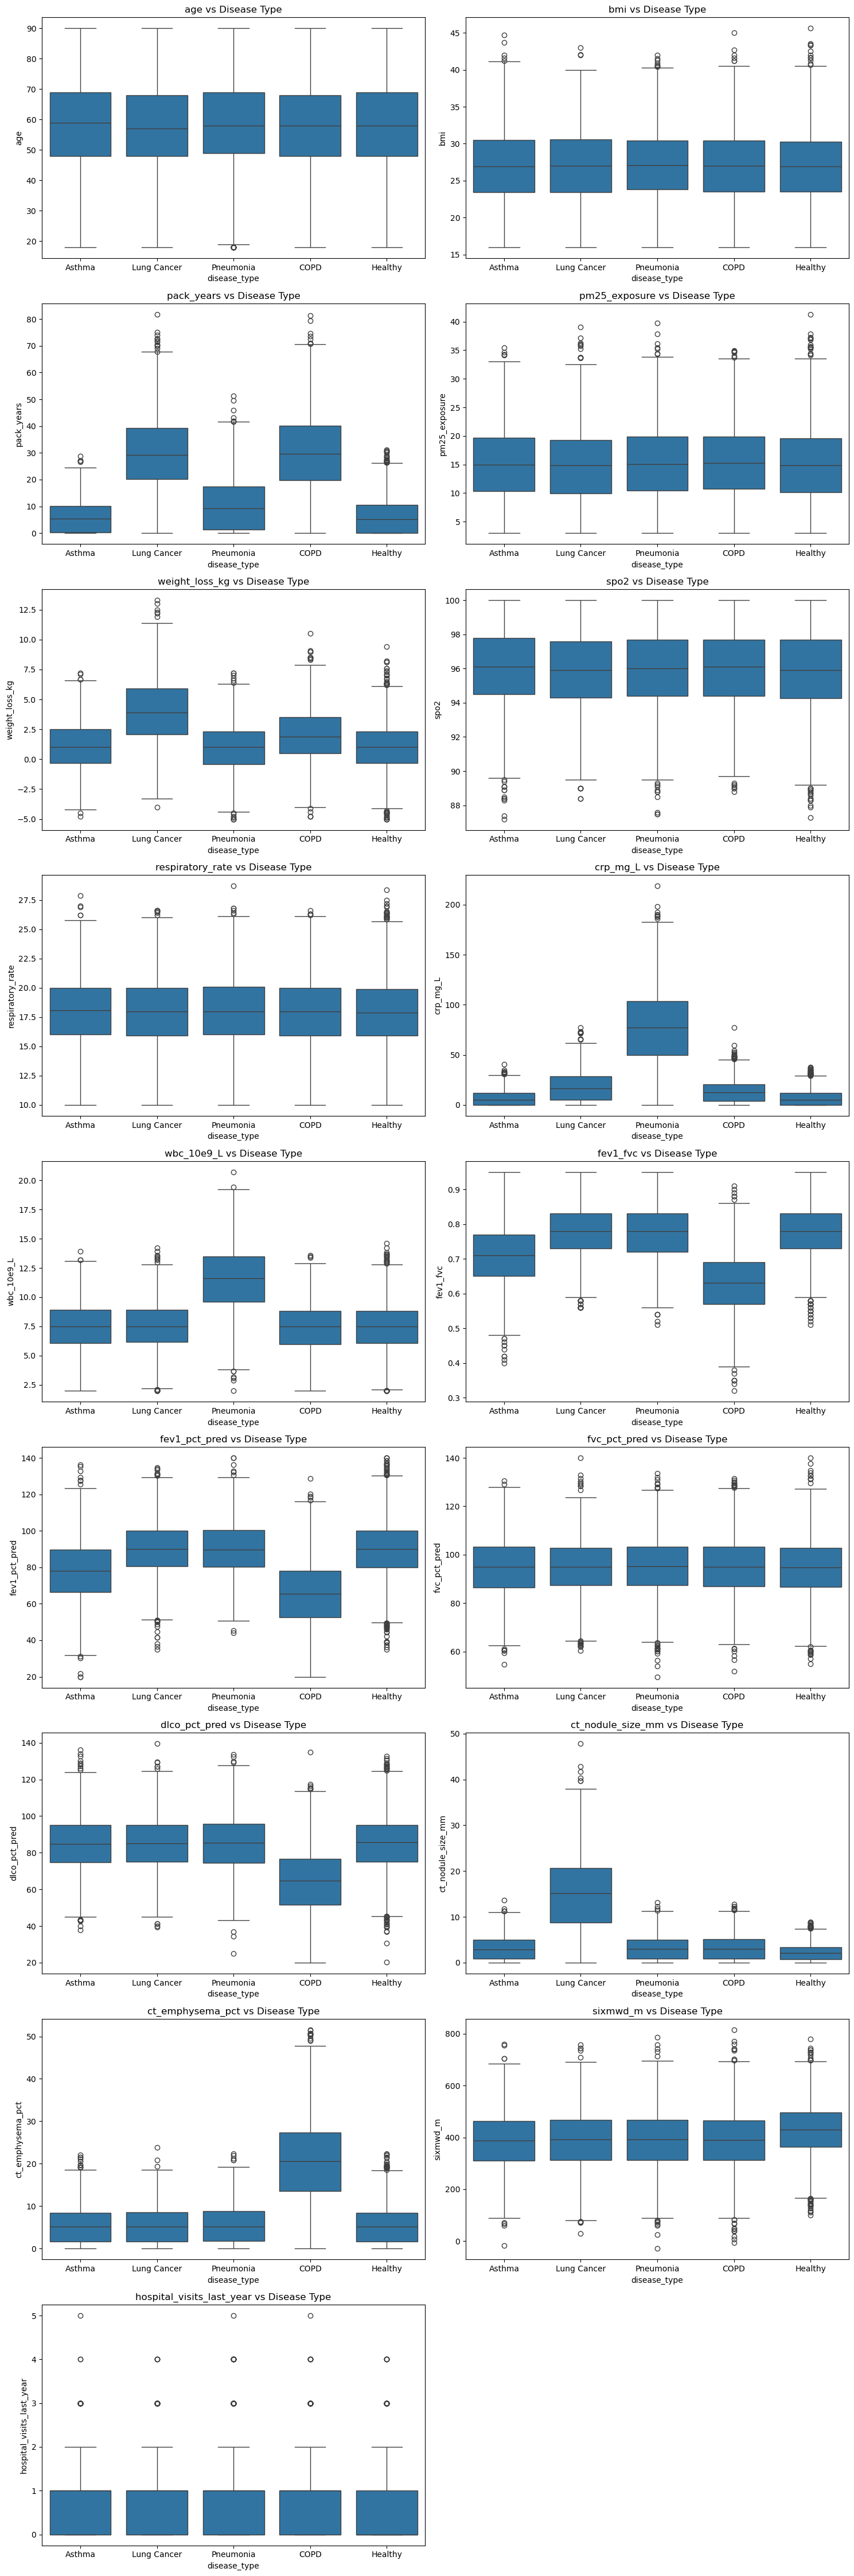

In [20]:
# Comparative Distribution Analysis

plt.figure(figsize=(15, 45))

for i, col in enumerate(df_num_var, 1):
    plt.subplot(9, 2, i)
    sns.boxplot(data=df, x="disease_type", y=col)
    plt.title(f"{col} vs Disease Type")

plt.tight_layout()
plt.show()

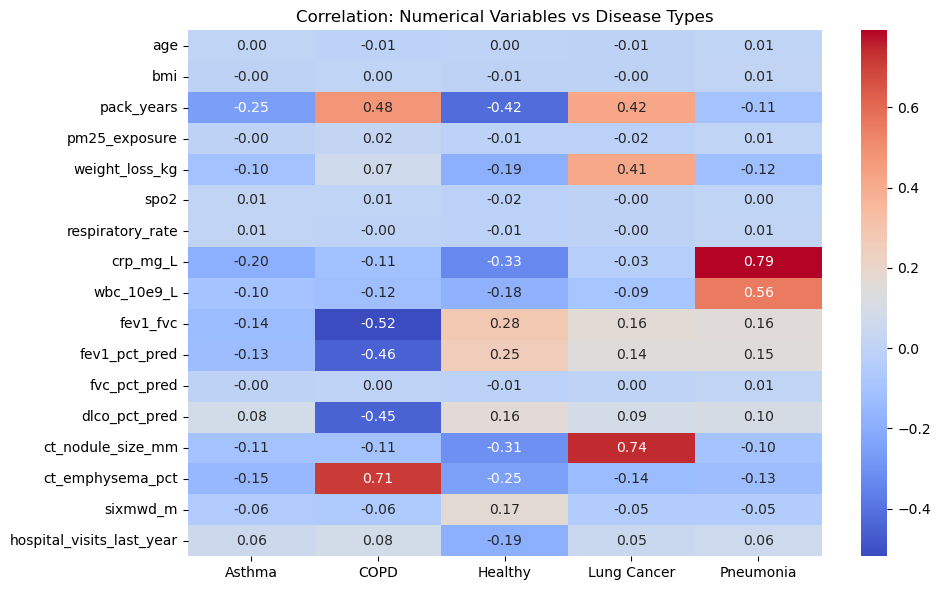

In [21]:
# Correlation Heatmap with resepct to Target Variable (disease_type)

target_dummies = pd.get_dummies(df["disease_type"])
corr_df = pd.concat([df_num_var, target_dummies], axis=1)
corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[df_num_var.columns, target_dummies.columns], annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation: Numerical Variables vs Disease Types")
plt.tight_layout()
plt.show()

In [22]:
# Analyzing numerical variable link with the target variable (disease_type)

from scipy.stats import f_oneway

anova_results = []

for col in df_num_var:
    groups = [df[df['disease_type'] == disease][col].dropna() for disease in df['disease_type'].unique()]

    f_stat, p_val = f_oneway(*groups)
    anova_results.append({ "Variable": col, "F-Statistic": round(f_stat, 2), "P-Value": p_val, "Significant": "Yes" if p_val < 0.05 else "No"})

anova_df = pd.DataFrame(anova_results).sort_values(by="F-Statistic", ascending=False)
print(anova_df)

                     Variable  F-Statistic       P-Value Significant
7                    crp_mg_L      5448.95  0.000000e+00         Yes
13          ct_nodule_size_mm      3749.45  0.000000e+00         Yes
2                  pack_years      3220.64  0.000000e+00         Yes
14           ct_emphysema_pct      3129.16  0.000000e+00         Yes
9                    fev1_fvc      1489.28  0.000000e+00         Yes
8                  wbc_10e9_L      1340.08  0.000000e+00         Yes
10              fev1_pct_pred      1057.25  0.000000e+00         Yes
12              dlco_pct_pred       766.65  0.000000e+00         Yes
4              weight_loss_kg       723.31  0.000000e+00         Yes
16  hospital_visits_last_year       117.49  1.784885e-98         Yes
15                   sixmwd_m        91.64  7.083925e-77         Yes
3               pm25_exposure         2.12  7.606079e-02          No
5                        spo2         1.12  3.465290e-01          No
6            respiratory_rate     

### Task 2 - Data Preperation

##### Missing values

In [23]:
# Checking for Missing values

df.isnull().sum()

age                             0
sex                             0
bmi                             0
smoking_status                  0
pack_years                      0
pm25_exposure                   0
occupation                      0
family_history               7176
cough                           0
dyspnea                         0
wheeze                          0
chest_pain                      0
fever                           0
hemoptysis                      0
weight_loss_kg                  0
spo2                            0
respiratory_rate                0
crp_mg_L                        0
wbc_10e9_L                      0
fev1_fvc                        0
fev1_pct_pred                   0
fvc_pct_pred                    0
dlco_pct_pred                   0
cxr_finding                     0
ct_nodule_size_mm               0
ct_emphysema_pct                0
sixmwd_m                        0
hypertension                    0
diabetes                        0
hospital_visit

In [24]:
#Handling missing value by removing the variable as its relation with the target variable is less significant

df = df.drop(columns=['family_history'])

##### Outliers

In [25]:
#Outlier Removal (outside 3.5 times of the IQR)

Q1 = df_num_var.quantile(0.25)
Q3 = df_num_var.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3.5 * IQR
upper_bound = Q3 + 3.5 * IQR

mask = (df_num_var >= lower_bound) & (df_num_var <= upper_bound)
clean_df = df[mask.all(axis=1)]

print("Original rows:", len(df))
print("Cleaned rows:", len(clean_df))
print("Removed rows:", len(df) - len(clean_df))

Original rows: 12000
Cleaned rows: 10914
Removed rows: 1086


##### Train-Test-Split

In [26]:
from sklearn.model_selection import train_test_split

df = clean_df
X = df.drop(columns=['disease_type'])
y = df['disease_type']

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (8185, 43)
Testing features shape: (2729, 43)


In [27]:
# Label Encoding for Target Variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(f"Target Classes: {le.classes_}")

Target Classes: ['Asthma' 'COPD' 'Healthy' 'Lung Cancer' 'Pneumonia']


##### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Mean of first feature in training: {X_train_scaled[:, 0].mean():.2f}")
print(f"Std of first feature in training: {X_train_scaled[:, 0].std():.2f}")

Mean of first feature in training: 0.00
Std of first feature in training: 1.00


### Task 3 - Model Training

#### Applying Machine Learning Models for Prediction

In [29]:
# 1. Logistic Regression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

print(f"Overall Accuracy of the Logistic Regresion Model is {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Overall Accuracy of the Logistic Regresion Model is 94.03%

Classification Report:
              precision    recall  f1-score   support

      Asthma       0.89      0.82      0.85       492
        COPD       0.98      0.96      0.97       516
     Healthy       0.92      0.96      0.94      1061
 Lung Cancer       0.99      0.96      0.97       337
   Pneumonia       0.97      0.99      0.98       323

    accuracy                           0.94      2729
   macro avg       0.95      0.94      0.94      2729
weighted avg       0.94      0.94      0.94      2729



C:\Users\mrash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


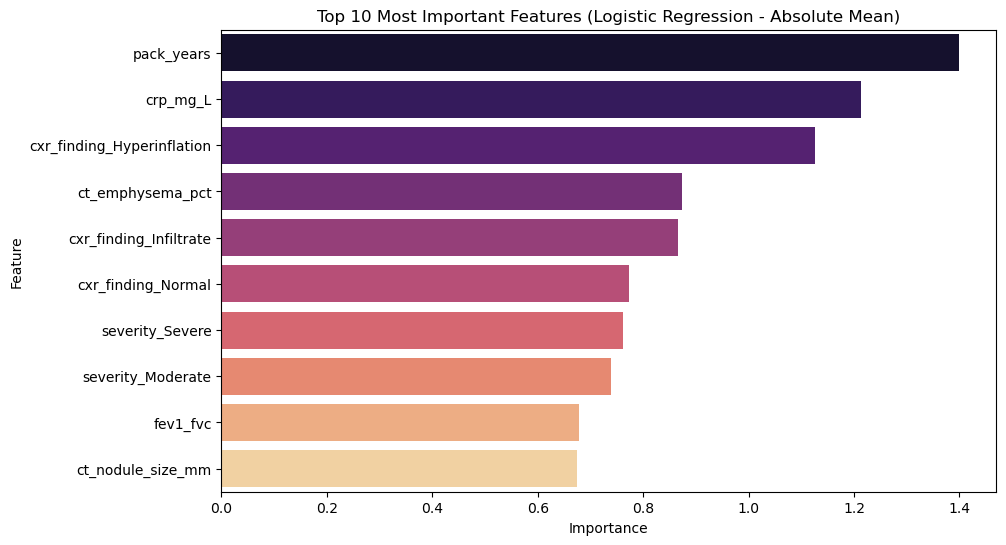

In [30]:
# Analysis of Feature importance for Logistic Regression

importances_lr = np.mean(np.abs(lr_model.coef_), axis=0)
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances_lr}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10), palette="magma", hue="Feature", legend=False)
plt.title("Top 10 Most Important Features (Logistic Regression - Absolute Mean)")
plt.show()

In [31]:
# 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42, criterion="entropy")
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

print(f"Overall Accuracy of the Decision Tree Model is {accuracy_score(y_test, y_pred_dt):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

Overall Accuracy of the Decision Tree Model is 89.81%

Classification Report:
              precision    recall  f1-score   support

      Asthma       0.82      0.77      0.80       492
        COPD       0.95      0.91      0.93       516
     Healthy       0.89      0.93      0.91      1061
 Lung Cancer       0.93      0.91      0.92       337
   Pneumonia       0.94      0.94      0.94       323

    accuracy                           0.90      2729
   macro avg       0.91      0.89      0.90      2729
weighted avg       0.90      0.90      0.90      2729



In [32]:
# Plotting the tree visualization

plt.figure(figsize=(25, 12), dpi=600)
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=le.classes_.tolist(), filled=True, rounded=True, proportion=True, precision=2)

plt.title("Decision Tree Logic")
plt.show()

In [33]:
# 3. Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print(f"Overall Accuracy of the Random Forest Model is {accuracy_score(y_test, y_pred_rf):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Overall Accuracy of the Random Forest Model is 93.81%

Classification Report:
              precision    recall  f1-score   support

      Asthma       0.89      0.82      0.85       492
        COPD       0.98      0.97      0.97       516
     Healthy       0.91      0.96      0.94      1061
 Lung Cancer       0.99      0.96      0.97       337
   Pneumonia       0.98      0.97      0.98       323

    accuracy                           0.94      2729
   macro avg       0.95      0.94      0.94      2729
weighted avg       0.94      0.94      0.94      2729



In [34]:
# 4. XG Boost (XGB)

from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42,use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print(f"Overall Accuracy of the XGBoost Model is {accuracy_score(y_test, y_pred_xgb):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

C:\Users\mrash\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Overall Accuracy of the XGBoost Model is 94.10%

Classification Report:
              precision    recall  f1-score   support

      Asthma       0.90      0.81      0.85       492
        COPD       0.98      0.97      0.98       516
     Healthy       0.92      0.97      0.94      1061
 Lung Cancer       0.98      0.98      0.98       337
   Pneumonia       0.98      0.97      0.98       323

    accuracy                           0.94      2729
   macro avg       0.95      0.94      0.94      2729
weighted avg       0.94      0.94      0.94      2729



In [35]:
# 5. LightGBM

from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42,verbosity=-1)
lgbm_model.fit(X_train_scaled, y_train)

y_pred_lgbm = lgbm_model.predict(X_test_scaled)

print(f"Overall Accuracy of the LightGBM Model is {accuracy_score(y_test, y_pred_lgbm):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=le.classes_))

Overall Accuracy of the LightGBM Model is 94.17%

Classification Report:
              precision    recall  f1-score   support

      Asthma       0.89      0.82      0.85       492
        COPD       0.99      0.97      0.98       516
     Healthy       0.91      0.96      0.94      1061
 Lung Cancer       0.99      0.98      0.99       337
   Pneumonia       0.98      0.97      0.98       323

    accuracy                           0.94      2729
   macro avg       0.95      0.94      0.95      2729
weighted avg       0.94      0.94      0.94      2729



In [36]:
# 6. K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print(f"Overall Accuracy of the KNN Model is {accuracy_score(y_test, y_pred_knn):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

Overall Accuracy of the KNN Model is 86.84%

Classification Report:
              precision    recall  f1-score   support

      Asthma       0.77      0.61      0.68       492
        COPD       0.97      0.87      0.92       516
     Healthy       0.80      0.98      0.88      1061
 Lung Cancer       0.99      0.84      0.91       337
   Pneumonia       0.99      0.93      0.96       323

    accuracy                           0.87      2729
   macro avg       0.91      0.85      0.87      2729
weighted avg       0.88      0.87      0.87      2729



In [37]:
# 7. Support Vector Classifier (SVC)

from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', probability=True, random_state=42)
svc_model.fit(X_train_scaled, y_train)

y_pred_svc = svc_model.predict(X_test_scaled)

print(f"Overall Accuracy of the SVC Model is {accuracy_score(y_test, y_pred_svc):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc, target_names=le.classes_))

Overall Accuracy of the SVC Model is 93.92%

Classification Report:
              precision    recall  f1-score   support

      Asthma       0.89      0.81      0.85       492
        COPD       0.98      0.96      0.97       516
     Healthy       0.91      0.97      0.94      1061
 Lung Cancer       1.00      0.95      0.98       337
   Pneumonia       0.98      0.98      0.98       323

    accuracy                           0.94      2729
   macro avg       0.95      0.94      0.94      2729
weighted avg       0.94      0.94      0.94      2729



### Task 4 - Model Evaluation

In [38]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

model_params = {"Logistic Regression": {"model": LogisticRegression(max_iter=1000),"params": {"C": [0.1, 1, 10]}},
                "Decision Tree": {"model": DecisionTreeClassifier(random_state=42),"params": {"max_depth": [5, 10, None]}},
                "Random Forest": {"model": RandomForestClassifier(random_state=42),"params": {"n_estimators": [50, 100], "max_depth": [5, 10]}},
                "XGBoost": {"model": XGBClassifier(eval_metric='mlogloss'),"params": {"learning_rate": [0.01, 0.1], "max_depth": [3, 5]}},
                "LightGBM": {"model": LGBMClassifier(verbosity=-1),"params": {"learning_rate": [0.01, 0.1],"max_depth": [5, 10], "num_leaves": [20, 31]}},
                "KNN": {"model": KNeighborsClassifier(),"params": {"n_neighbors": [3, 5, 7]}},
                "SVC": {"model": SVC(probability=True),"params": {"C": [0.1, 1, 10], "kernel": ['rbf', 'linear']}}}

best_models = {}

for name, mp in model_params.items():
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring="accuracy")
    grid.fit(X_train_scaled, y_train)
    best_models[name] = {"Best_CV_Score": grid.best_score_, "Best_Params": str(grid.best_params_)}
    
leaderboard = pd.DataFrame(best_models).T.sort_values(by="Best_CV_Score", ascending=False)
print("\n--- Model Tuning Leaderboard ---")
print(leaderboard)


--- Model Tuning Leaderboard ---
                    Best_CV_Score  \
Logistic Regression      0.935736   
LightGBM                 0.935736   
SVC                      0.934881   
XGBoost                  0.934514   
Random Forest            0.929627   
Decision Tree            0.888088   
KNN                      0.867929   

                                                           Best_Params  
Logistic Regression                                           {'C': 1}  
LightGBM             {'learning_rate': 0.1, 'max_depth': 10, 'num_l...  
SVC                                     {'C': 0.1, 'kernel': 'linear'}  
XGBoost                         {'learning_rate': 0.1, 'max_depth': 3}  
Random Forest                   {'max_depth': 10, 'n_estimators': 100}  
Decision Tree                                        {'max_depth': 10}  
KNN                                                 {'n_neighbors': 3}  


In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize

In [40]:
# Fit the tuned Logistic Regression Model

tuned_log_reg = LogisticRegression(C=1, max_iter=1000)
tuned_log_reg.fit(X_train_scaled, y_train)

log_pred = tuned_log_reg.predict(X_test_scaled)
log_prob = tuned_log_reg.predict_proba(X_test_scaled)

log_auc = roc_auc_score(y_test, log_prob, multi_class='ovr', average='weighted')
print("Tuned Logistic Regression ROC-AUC (OvR, weighted):", round(log_auc, 4))

Tuned Logistic Regression ROC-AUC (OvR, weighted): 0.9921


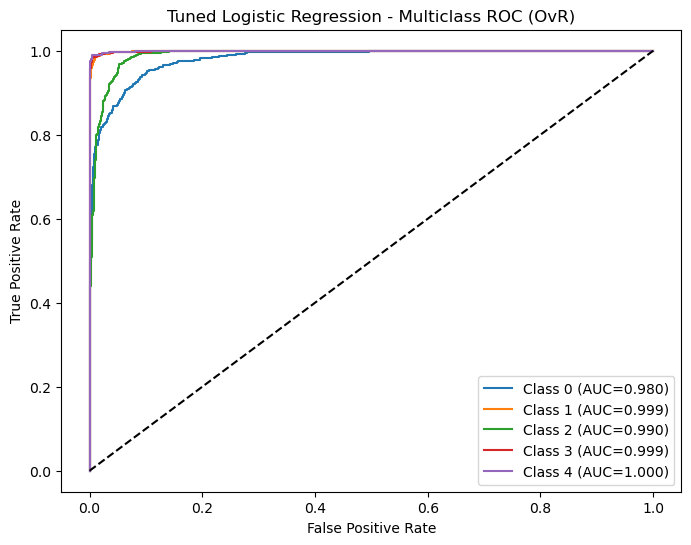

In [41]:
# Model Evaluation for Tuned Logistic Regression - ROC

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], log_prob[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], log_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC={auc_score:.3f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tuned Logistic Regression - Multiclass ROC (OvR)")
plt.legend()
plt.show()

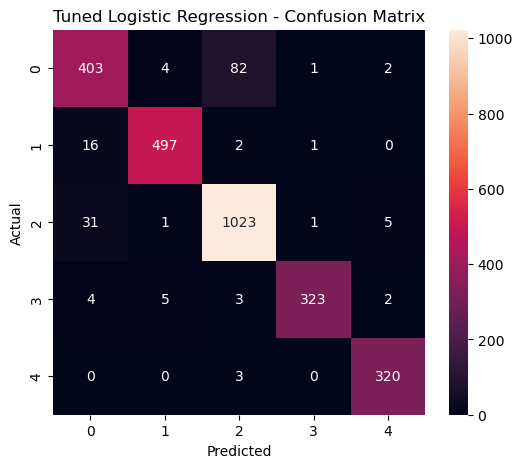

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       492
           1       0.98      0.96      0.97       516
           2       0.92      0.96      0.94      1061
           3       0.99      0.96      0.97       337
           4       0.97      0.99      0.98       323

    accuracy                           0.94      2729
   macro avg       0.95      0.94      0.94      2729
weighted avg       0.94      0.94      0.94      2729



In [42]:
# Model Evaluation for Tuned Logistic Regression - Confusion Matrix

log_cm = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(6,5))
sns.heatmap(log_cm, annot=True, fmt='d',xticklabels=classes, yticklabels=classes)
plt.title("Tuned Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, log_pred))

In [43]:
# Analyzing Train-Test Gap (Tuned Logistic Model)

log_train_pred = tuned_log_reg.predict(X_train_scaled)
log_train_acc = accuracy_score(y_train, log_train_pred)

log_test_pred = tuned_log_reg.predict(X_test_scaled)
log_test_acc = accuracy_score(y_test, log_test_pred)

print("Tuned Logistic Regression")
print("Training Accuracy :", round(log_train_acc, 4))
print("Test Accuracy     :", round(log_test_acc, 4))
print("Gap (Train-Test)  :", round(log_train_acc - log_test_acc, 4))

Tuned Logistic Regression
Training Accuracy : 0.9417
Test Accuracy     : 0.9403
Gap (Train-Test)  : 0.0015


In [44]:
# Fit the tuned LightGBM

tuned_lgbm = LGBMClassifier(learning_rate=0.1, num_leaves=20, verbosity=-1)
tuned_lgbm.fit(X_train_scaled, y_train)

lgbm_pred = tuned_lgbm.predict(X_test_scaled)
lgbm_prob = tuned_lgbm.predict_proba(X_test_scaled)

lgbm_auc = roc_auc_score(y_test, lgbm_prob, multi_class='ovr', average='weighted')
print("Tuned LightGBM ROC-AUC (OvR, weighted):", round(lgbm_auc, 4))

Tuned LightGBM ROC-AUC (OvR, weighted): 0.9915


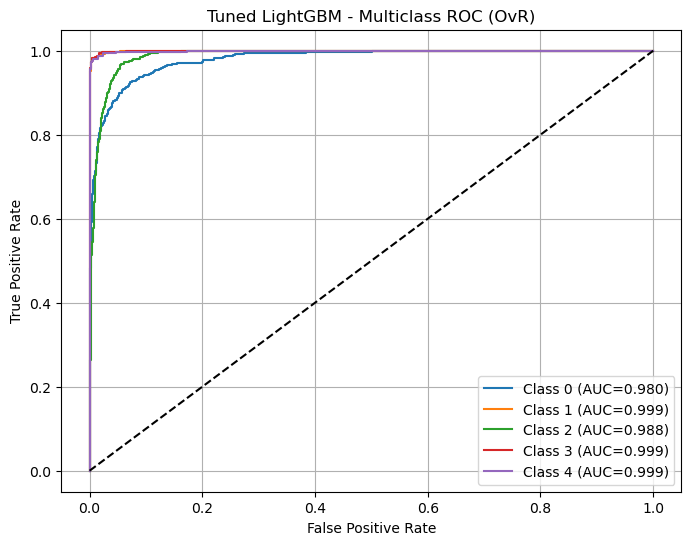

In [45]:
# Model Evaluation for Tuned LightGBM - ROC

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], lgbm_prob[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], lgbm_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC={auc_score:.3f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tuned LightGBM - Multiclass ROC (OvR)")
plt.legend()
plt.grid()
plt.show()

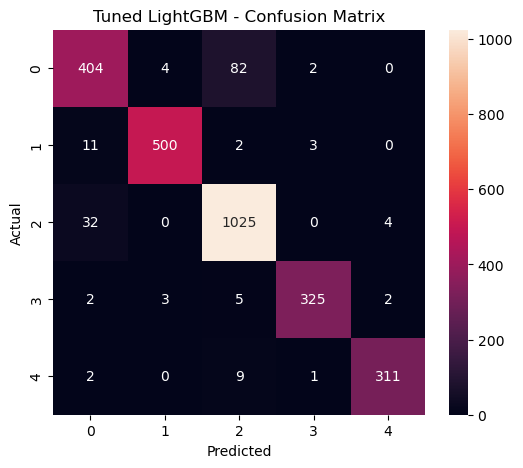

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       492
           1       0.99      0.97      0.98       516
           2       0.91      0.97      0.94      1061
           3       0.98      0.96      0.97       337
           4       0.98      0.96      0.97       323

    accuracy                           0.94      2729
   macro avg       0.95      0.94      0.94      2729
weighted avg       0.94      0.94      0.94      2729



In [46]:
# Model Evaluation for Tuned LightGBM - Confusion Matrix

lgbm_cm = confusion_matrix(y_test, lgbm_pred)

plt.figure(figsize=(6,5))
sns.heatmap(lgbm_cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title("Tuned LightGBM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, lgbm_pred))

In [47]:
# Analyzing Train-Test Gap (LightGBM Model)

lgbm_train_pred = tuned_lgbm.predict(X_train_scaled)
lgbm_train_acc = accuracy_score(y_train, lgbm_train_pred)

lgbm_test_pred = tuned_lgbm.predict(X_test_scaled)
lgbm_test_acc = accuracy_score(y_test, lgbm_test_pred)

print("\nTuned LightGBM")
print("Training Accuracy :", round(lgbm_train_acc, 4))
print("Test Accuracy     :", round(lgbm_test_acc, 4))
print("Gap (Train-Test)  :", round(lgbm_train_acc - lgbm_test_acc, 4))


Tuned LightGBM
Training Accuracy : 0.9969
Test Accuracy     : 0.9399
Gap (Train-Test)  : 0.057


In [48]:
comparison = pd.DataFrame({"Model": ["Tuned Logistic Regression", "Tuned LightGBM"], "Train Accuracy": [log_train_acc, lgbm_train_acc],
                           "Test Accuracy": [log_test_acc, lgbm_test_acc],"Gap": [log_train_acc - log_test_acc, lgbm_train_acc - lgbm_test_acc]})

print(comparison)

                       Model  Train Accuracy  Test Accuracy       Gap
0  Tuned Logistic Regression        0.941723       0.940271  0.001452
1             Tuned LightGBM        0.996946       0.939905  0.057041


In [49]:
# Model Explanation using SHAP

import shap

explainer = shap.LinearExplainer(tuned_log_reg, X_train_scaled)
shap_values = explainer(X_test_scaled)

if len(shap_values.values.shape) == 3:
    global_importances = np.abs(shap_values.values).mean(axis=(0, 2))
else:
    global_importances = np.abs(shap_values.values).mean(0)

top_features = pd.DataFrame({'feature': X.columns, 'importance': global_importances.flatten()})
top_features = top_features.sort_values('importance', ascending=False).head(10)

print("Top 10 Features by SHAP Importance:")
print(top_features)

Top 10 Features by SHAP Importance:
                       feature  importance
2                   pack_years    1.119831
13                    crp_mg_L    0.832579
36  cxr_finding_Hyperinflation    0.770750
39          cxr_finding_Normal    0.766235
41           severity_Moderate    0.644844
20            ct_emphysema_pct    0.625195
15                    fev1_fvc    0.515604
19           ct_nodule_size_mm    0.463970
14                  wbc_10e9_L    0.459703
38     cxr_finding_Mass/Nodule    0.453700


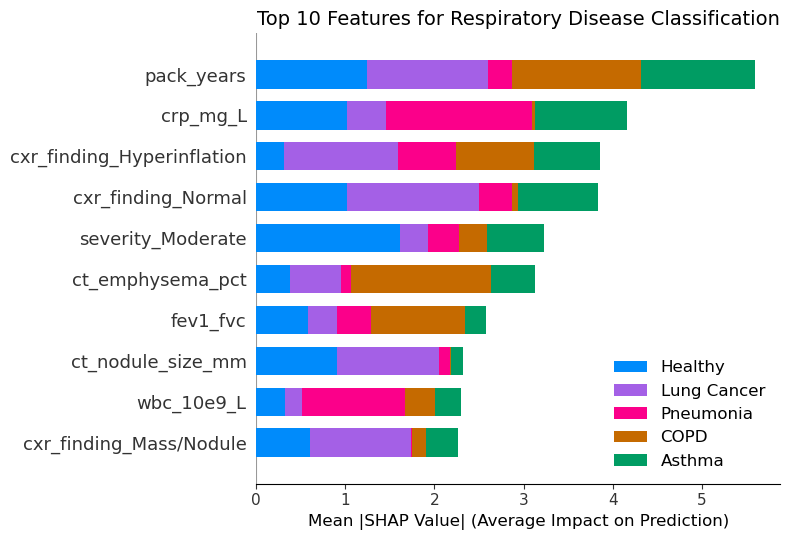

In [50]:
# SHAP top 10 feature visualization

disease_type = ["Asthma", "COPD", "Healthy", "Lung Cancer", "Pneumonia"]

explainer = shap.LinearExplainer(tuned_log_reg, X_train_scaled)
shap_values = explainer(X_test_scaled)

plt.figure(figsize=(10, 6))

shap.summary_plot(shap_values.values, X_test_scaled, feature_names=X.columns, class_names=disease_type,plot_type="bar", max_display=10,show=False)

plt.title("Top 10 Features for Respiratory Disease Classification", fontsize=14)
plt.xlabel("Mean |SHAP Value| (Average Impact on Prediction)", fontsize=12)
plt.tight_layout()
plt.show()

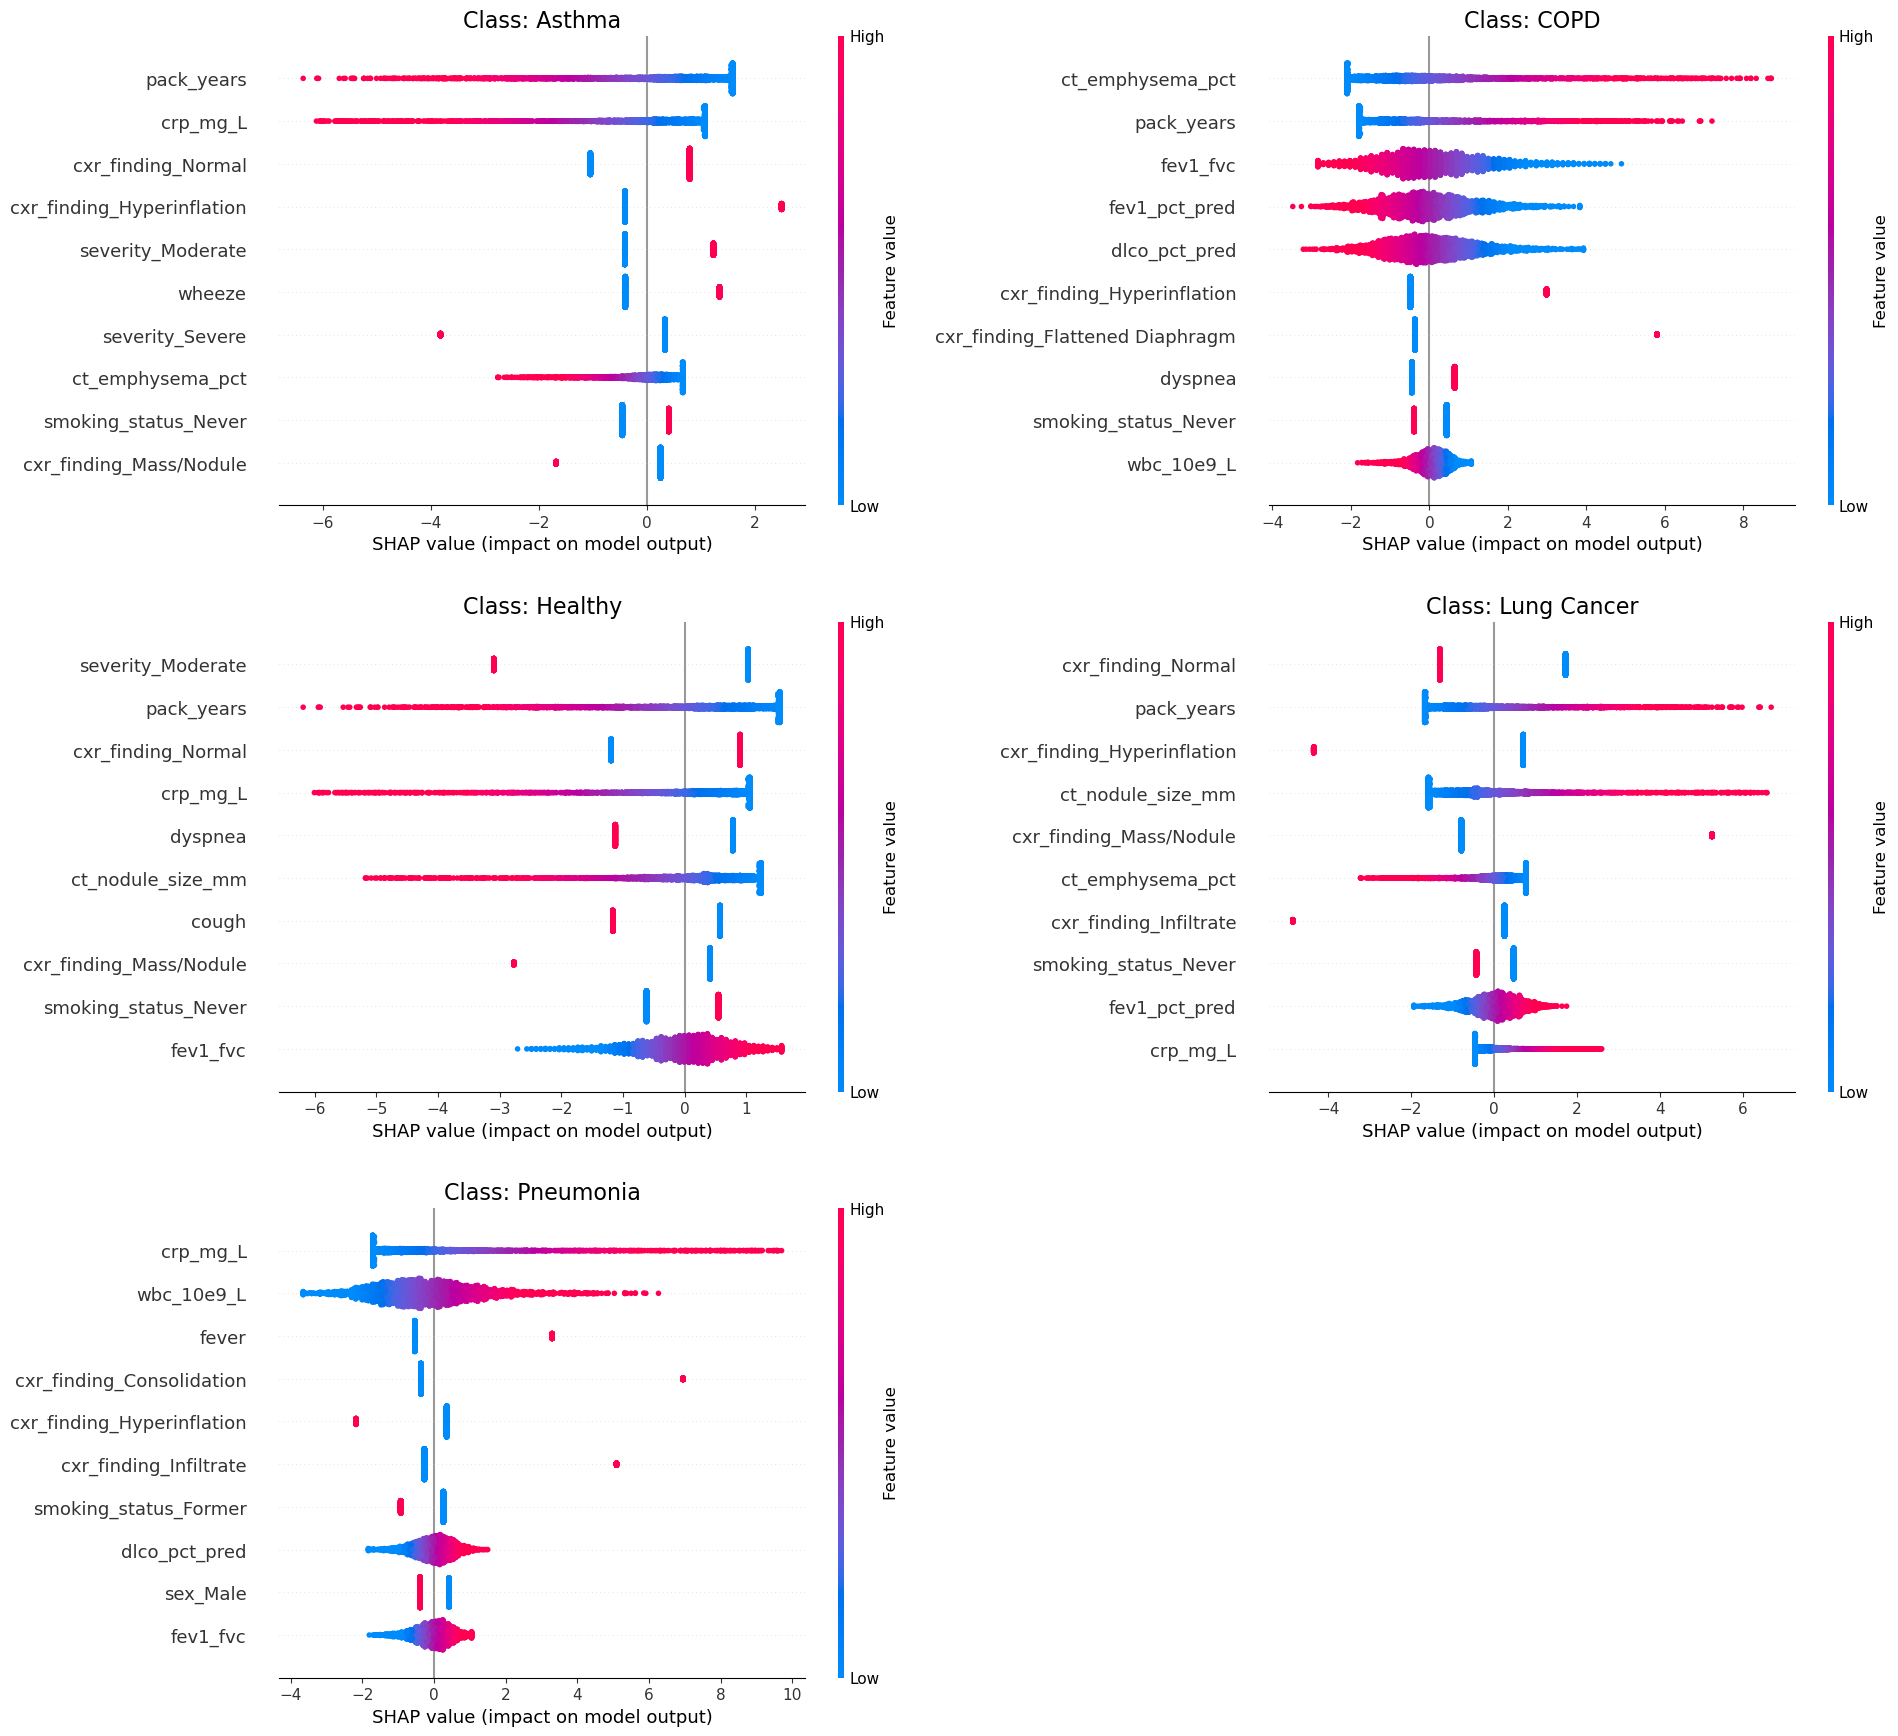

In [51]:
disease_type = ["Asthma", "COPD", "Healthy", "Lung Cancer", "Pneumonia"]

explainer = shap.LinearExplainer(tuned_log_reg, X_train_scaled)
shap_values = explainer(X_test_scaled)

fig = plt.figure(figsize=(20, 18))

for i, disease in enumerate(disease_type):
    plt.subplot(3, 2, i + 1)

    shap.summary_plot(shap_values.values[:, :, i], X_test_scaled, feature_names=X.columns,max_display=10,show=False,plot_size=None)
    plt.title(f"Class: {disease}", fontsize=16)

plt.tight_layout(pad=3.0)
plt.savefig("SHAP Visualization.png", dpi=300, bbox_inches='tight')
plt.show()